In [1]:
import os, glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image, display

import sys
sys.path.append('..')
import helpers, datasets, surfaces, matrices

sns.set_style('ticks')

/home/asaberi/laminar_organization/env/lib/python3.9/site-packages/nilearn/input_data/__init__.py:27: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)


In [2]:
ahba_df = datasets.fetch_ahba_data(
    parcellation_name='schaefer400', 
    ibf_threshold=0.5, missing='centroids')['all']

(0.0, 200.0, 15631.0, 0.0)

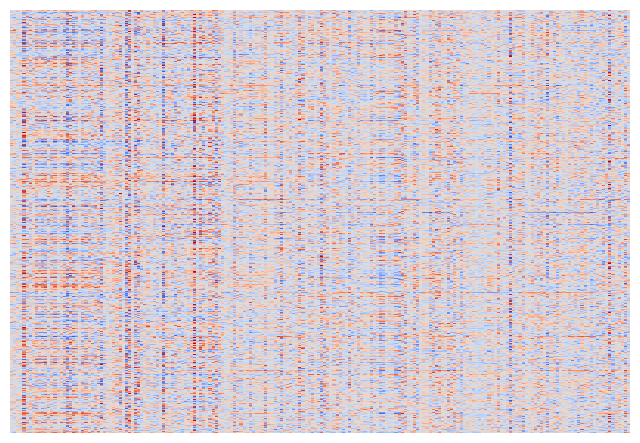

In [3]:
ax = sns.heatmap(ahba_df.values.T, cmap='coolwarm', cbar=False)
ax.axis('off')

CGE matrix:

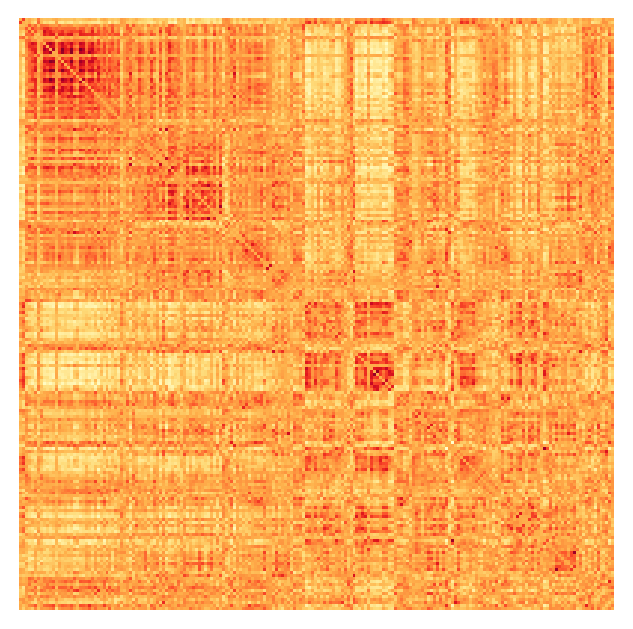

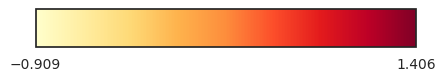

In [4]:
cge = matrices.CorrelatedGeneExpressionMatrix('schaefer400', brain_specific=False)
cge.plot(vrange=(0, 1))

Correlation of LTC with CGE:

Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-schaefer400_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz
Pearson correlation with Correlated gene expression
Coef: 0.24310923287751726; p-value (spin): 0.001


(0.24310923287751726, 0.001)

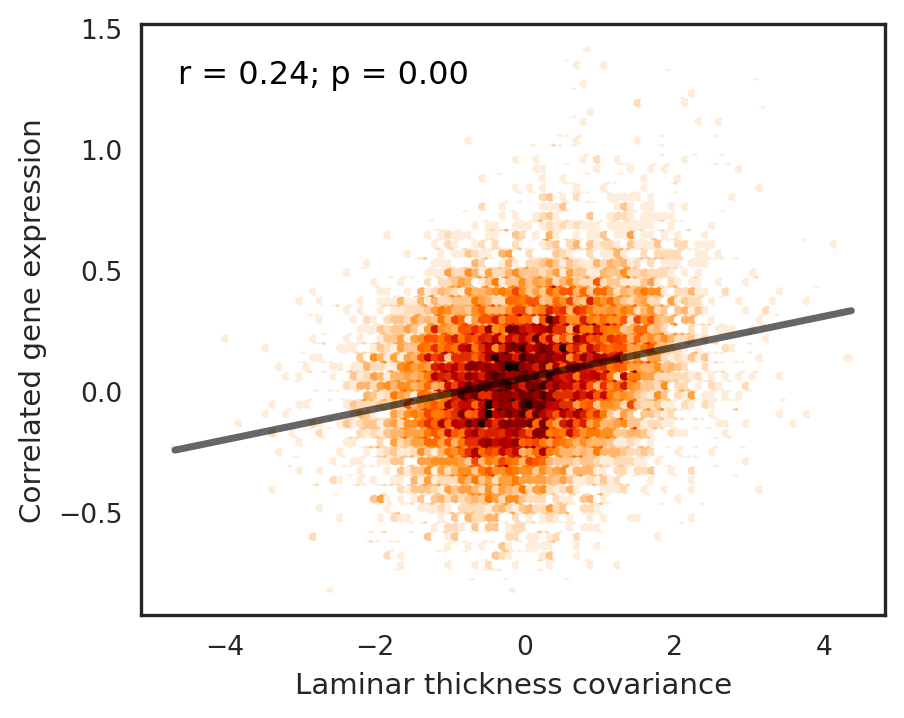

In [5]:
ltc = matrices.MicrostructuralCovarianceMatrix('thickness', 'schaefer400')
ltc.correlate_edge_wise(cge, axis_off=False, figsize=(5,4))